# Machine Learning
There is an abundance of data in the world, in order to make sense of this data we are becoming increasingly dependant on fields such as data visualization (you took an excellent course on this) and machine learning to make all of this data consumable.  Machine learning is the ability for an algorithm to learn without being explicitly programmed.  If you were coding an AI agent you would explicitly program it to look for the player, in machine learning we use past experience to drive choices.

To do this we use patterns from the past to predict future unknowns.  In essence what we're doing is trying to find a mapping (f) where we can use *input* data (x) to predict an *output* (y).

y = f(x)

## Past Experience
Some aspects of how machines learn is very similar to the way humans learn, we can both take advantage of past experience.  While animals get some stuff for free (we know how to breath automatically), machines start off with nothing and must rely solely and the past experience provided to them.  But what is this 'experience'?  In machine learning we use past data where we know the inputs and the output, the algorithm can then find a connection between these to make an educated guess about a future unknown.

> Essentially, all models are wrong, but some are useful.
>
> Box, George E. P.

For example, if I had a database of student information I could feed this to an algorithm and ask it to find a connection between heights (input) and shoe size (output).  If we take a look at a single sample there really is no limit to the number of functions we could find.

```
# 12 (size shoe) = f(6(height))
f = x + 6
f = x * 2
f = x^2 / 3
```

For this sample any of these functions will work, its up to us to pick the function that works as well as possible for the most samples.  To determine if a function works well we just compare the results to our desired output.  We also typically want the simplest algorithm that solves our problem.

## Correlation and Causation
We have an important caveat here, we are able to take advantage of *related* past experience.  In the previous shoe size example, what if our input was hair color, or name?  One of the first things we will need to do in an ML problem is to look for correlated inputs, if an input is not correlated to the output then it is unlikely we will be able to use it for anything.  We typically don't care about causation, our goal is not to find why the output is changing, only to predict its change.  Looking at the graph below we can see that there is some relationship between x and y.  If the y axis is shoe size then x could certainly reprsent height, weight or age.  Or it could represent how many pokemon that person owns.

<img src="images\regression00.png" width=500> </td>

## Learning Types
Algorithms can predict categorical or quantitative outputs (we will restrict ourselves to single output feature for now), however input data must be quantitative (ordinal can work in some cases).  If a dataset has categorical features we will need to convert these first.  There are different ways for the machine to learn and generally take one of the following forms

* supervised learning - discover the link between input and output
    * classification - categorical output
    * regression - quantitative output
* unsupervised learning - no output, looking for patterns
* reinforcement learning - feedback supervised learning

## Data Quality
In general machine learning algorithms thrive on large amounts of good data, unfortunately this can be very difficult to get.  Another issue is that our output might be affected by a *hidden feature*, this is data that we do not have but is affecting the output.  Where we don't have data, the model isn't going know anything. We need to use our intuition, tools, and analysis to help pick good data, though it will typically have some of the following characteristics (some of these we can fix).  Depending on the type of problem you are working on, the output will have quality indicators as well.

* correlated to output features
* standard distribution (68-95-99)
* zero mean with unit variance
* low cardinality
* non-zero variance
* low number of missing / sparse
* not collinear
* representative of real world conditions

We should also shuffle our data before doing anything to it, if samples were created in the data set in a particular order this could affect our models.  Be sure to set a seed for anything random that you do.

## Examples
### Corpus / Lexicon
A researcher, Janelle Shane, trained a neural network to come up with heavy metal band names.  His algorithm was fed 100,000 band names and learned to generate the following.  In these cases the dataset has a special name, lexicon.  If the dataset help full text instead of just names it would be known as a corpus.

* Sun Damage Omen
* Dragonred of Blood
* Deathcrack
* Chaosrug

The same resercher trained an algorithm to generate super hero names.

* Red Fart
* Lid Man
* Starm Surper
* Wolver Man

### Neural Network
You might have read about google's deep dream program, it uses neural networks to enhance patterns found in an image.

<img src="images\deepdream00.jpg" width=500/> <img src="images\deepdream01.jpg" width=500/>

We can do some really weird stuff with neural networks, here is a screen shot from NVIDIA's fake face generator.

<img src="images\fake_face.png" width=500/>

### MNIST
This is known as the MNIST data set used for hand writing recognition

<img src="images\mnist.jpg" width=500/>


### Spectral
Spectral is a research project that I am a part of, we use machine learning to predict the energy from the sun using easily obtained inputs.

<img src="images\spectral01.png" width=500/>


# EDA
An important part of working in machine learning is the EDA process, statistical analysis and charts can help us make better choices creating models.  It might not seem important, but building a relationship with the data is critical.  If we don't understand our data, we will not be able to make good choices for data transformation techniques, models, or validation.

First lets just look at raw data.

In [1]:
import pandas as pd

df = pd.read_csv('assets\small_data.csv')
print(df.values)

[[1 8.32 8.2 'Twilight Struggle' 21003 2005]
 [2 8.72 8.153 'Pandemic Legacy' 3646 2015]
 [3 8.27 8.134 'Terra Mystica' 15846 2012]
 [4 8.25 8.055 'Caverna' 10507 2013]
 [5 8.2 8.049 'Through the Ages' 13715 2006]
 [6 8.13 8.037 'Puerto Rico' 41009 2002]
 [7 8.1 8.022 'Agricola' 40962 2007]
 [8 8.09 7.963 'The Castles of Burgundy' 16873 2011]
 [9 8.15 7.963 'Mage Knight Board Game' 13512 2011]
 [10 8.13 7.948 'Android: Netrunner' 16115 2012]
 [11 8.36 7.935 'Star Wars: Imperial Assault' 5241 2014]
 [12 8.07 7.924 'Eclipse' 16440 2011]
 [13 7.98 7.911 'Power Grid' 35605 2004]
 [14 8.35 7.907 'War of the Ring ' 4211 2012]
 [15 8.07 7.872 'Robinson Crusoe' 11611 2012]
 [16 7.98 7.868 'Le Havre' 16283 2008]
 [17 8.03 7.858 'Brass' 9100 2007]
 [18 7.97 7.824 "Tzolk'in" 13059 2012]
 [19 8.02 7.817 'Dead of Winter' 11506 2014]
 [20 7.86 7.784 '7 Wonders' 38823 2010]]


If we look at the raw data it is difficult to make any connection to what is going on, however when we graph the results some clear connections can be made, the pairplot  will give us a basic idea of any relationships that might exist that we should focus on.

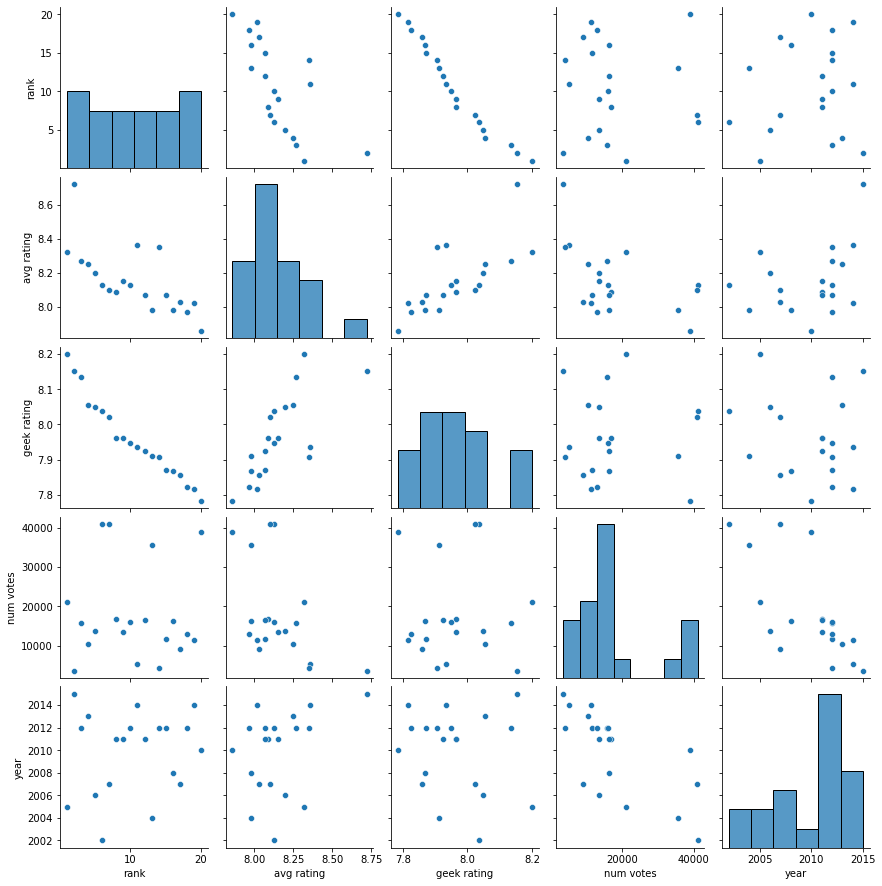

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

### Correlation Plot
To further examine these relationships we can show a correlation plot, which is a seaborn heatmap with specific input.  The corr function from the dataframe provides a correlation matrix in which values of 1 indicate a strong positive relationship, -1 indicates a strong negative relationship, and 0 indicates no relationship at all.  Pick one of the features below as a test output, which inputs would be useful as a predictor?

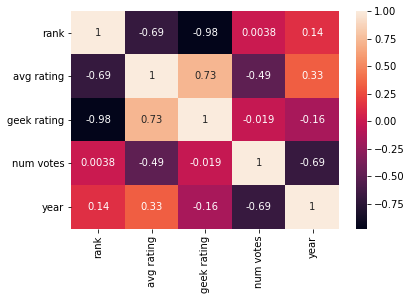

In [3]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

### Collinearity Plot
Collinearity is an issue that can occur when some of your input features are highly correlated.  This can cause two issues:  if you want to discover which input feature is actually causing a change on the output (we typically don't care about this), or if you have multiple features that are nearly identical the model will not be able to learn anything new from the redundant information (having extra redundant features makes the problem more complex).  There is no definite threshold, but we should be alarmed if two input features are correlated above 0.9. 

Detecting collinearity is as simple as using seaborn to draw a heatmap of the correlation matrix and see which features are highly correlated. One thing to be careful about with this approach is that a large negative correlation would not be displayed, so be sure to get the absolute value of your matrix first. 

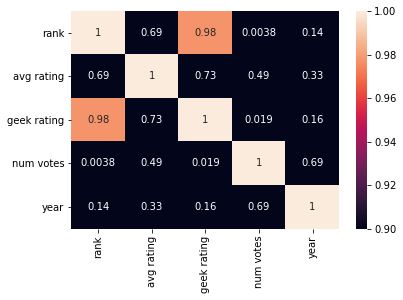

In [6]:
corr = corr.abs()
sns.heatmap(corr, vmin=0.9, vmax=1, annot=True)
plt.show()

# SKLearn
For the first part of this class we are going to explore machine learning using sklearn, a library included in anaconda.  Sklearn is a high level api whose goal is to provide black box machine learning algorithms for quick use.  In part this is great since you can train and get predictions quickly, though sometimes the lack of customization can prove to be problematic.  Sklearn also does not currently have good support for neural networks.

## Estimators
The main type of object found in sklearn is called an estimator, this is anything that can learn from data.  Generally an estimator will take input and output data, when we create the object there are options we can change about how it learns (these are called hyper parameters).  Once the object has learned we can use it to get whatever result the esimator provides (often these are predictions, but it can be data transformations among other things).

<img src="images\black_box.png" width=900/>

### Functionality
Every estimator comes with the following functions, many come with additional functions and attributes.  We've been talking about how models learn, and how we can use them to get predictions, these are the functions used to do so.  The final piece is the ability to test a model to see how well it performs.  There is a lot more that needs to be done (before and after), but we can think of this as the base functionality for a model:  learn, score, predict.  I've listed the expected shape of the arguments as well, if they don't match what is expected then you will get an error.

* fit(X,y) - model learns
    * X (number of samples, number of features)
    * y (number of samples)


* predict(X) - makes a prediction 
    * X (number of features)
    
    
* score(X, y) - evaluates model accuracy, 0 to 1 representing percentage correct
    * X (number of samples, number of features)
    * y (number of samples)

## Dummy Estimator
Sometimes it is useful to create a dummy estimator as a sanity check to make sure your actual estimator is working better than a simple rule system.  We can tune the dummy models to make predictions based on the following rules.

* stratified - random prediction based on target values
* most_frequent - pick the mode
* uniform - random predictions
* constant - always pick a user defined target value

In [5]:
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd

df = pd.read_csv('assets/small_data.csv')

# separate data to input and output
X = df.loc[:, ['avg rating', 'num votes']]
y = df.loc[:, 'names']

# tune hyper parameter
model = DummyClassifier(strategy='uniform')

# learn!
model.fit(X, y)

# sample where we don't know the output
unknown = np.array([[8.4, 1000]])

# predict what the unknown game's name would be
print(f'Prediction: {model.predict(unknown)}')

# evaluate how good model is doing
model.score(X, y)

Prediction: ['7 Wonders']


0.0

# Workflow
There is not a strict blueprint for how to complete a machine learning problem, with varying data the workflow for each problem will be drastically different.  This general workflow can help, but shouldn't be strictly followed.  As the course progresses we will uncover more and transition from naive approaches to more robust.

<td> <img src="images\ml_workflow00.png" alt="Drawing" style="width:850px;"/> </td>

# OK
Hopefully now you have at least a shallow understanding of what we're going to do in this class.  We take a large amount of data and train an algorithm to make predictions about things we wish to know.  Thats a bit of an oversimplification, but we can start getting into the details next time.

Also don't forget to brush on your other data science tools if you are rusty, looking through notebooks for DVM might help if you are rusty on any of these topics.